In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [174]:
data.columns


Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [175]:
data = data.drop(['Unnamed: 0', 'match_event_id', 'date_of_game','match_id','team_id'],axis=1)

In [176]:
data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [177]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot              object
shot_basics               object
range_of_shot             object
team_name                 object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [178]:
data.area_of_shot.value_counts()

Center(C)                12761
Right Side Center(RC)     4562
Right Side(R)             4370
Left Side Center(LC)      3848
Left Side(L)              3573
Mid Ground(MG)              81
Name: area_of_shot, dtype: int64

In [179]:
# data = pd.get_dummies(data.area_of_shot)
s= pd.get_dummies(data.area_of_shot)

In [180]:
data = pd.concat([data, s], axis=1)

In [181]:
data = data.drop(['area_of_shot', 'Center(C)'],axis=1)

In [182]:
data.shape

(30697, 27)

In [183]:
data.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,shot_basics,...,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1,Left Side Center(LC),Left Side(L),Mid Ground(MG),Right Side Center(RC),Right Side(R)
0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Mid Range,...,10.00,1.0,50.608,54.2000,38.0,0,0,0,0,1
1,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Mid Range,...,10.00,1.0,28.800,22.0000,35.0,0,1,0,0,0
2,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Mid Range,...,92.64,1.0,0.000,63.7216,54.4,1,0,0,0,0
3,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Mid Range,...,NaN,1.0,122.608,52.0000,42.0,0,0,0,1,0
4,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Goal Area,...,42.64,2.0,0.000,19.0000,20.0,0,0,0,0,0


In [184]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
shot_basics               object
range_of_shot             object
team_name                 object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
Left Side Center(LC)       uint8
Left Side(L)               uint8
Mid Ground(MG)             uint8
Right Side Center(RC)      uint8
Right Side(R)              uint8
dtype: object

In [185]:
data.range_of_shot.value_counts()

Less Than 8 ft.    8933
16-24 ft.          7892
8-16 ft.           6290
24+ ft.            5937
Back Court Shot      81
Name: range_of_shot, dtype: int64

In [186]:
# data = pd.get_dummies(data.area_of_shot)
p= pd.get_dummies(data.range_of_shot)
data = pd.concat([data, p], axis=1)

In [187]:
data = data.drop(['range_of_shot', 'Less Than 8 ft.'],axis=1)

In [188]:
data.shape

(30697, 30)

In [189]:
data.type_of_shot = data.type_of_shot.fillna("0")
data.type_of_combined_shot = data.type_of_combined_shot.fillna("0")

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.type_of_shot = le.fit_transform(data.type_of_shot)
data.type_of_combined_shot = le.fit_transform(data.type_of_combined_shot)

In [191]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
shot_basics               object
team_name                 object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot               int32
type_of_combined_shot      int32
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
Left Side Center(LC)       uint8
Left Side(L)               uint8
Mid Ground(MG)             uint8
Right Side Center(RC)      uint8
Right Side(R)              uint8
16-24 ft.                  uint8
24+ ft.                    uint8
8-16 ft.                   uint8
Back Court Shot            uint8
dtype: obj

In [192]:
data.pop('game_season')
print(1)

1


In [193]:
data.shot_basics.value_counts()

Mid Range          11955
Goal Area           6787
Penalty Spot        5321
Goal Line           4357
Right Corner         367
Left Corner          268
Mid Ground Line       67
Name: shot_basics, dtype: int64

In [194]:
# data = pd.get_dummies(data.area_of_shot)
p= pd.get_dummies(data.shot_basics)
data = pd.concat([data, p], axis=1)

In [195]:
data.shape

(30697, 36)

In [196]:
data = data.drop(['shot_basics','Right Corner'],axis=1)

In [197]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
team_name                 object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot               int32
type_of_combined_shot      int32
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
Left Side Center(LC)       uint8
Left Side(L)               uint8
Mid Ground(MG)             uint8
Right Side Center(RC)      uint8
Right Side(R)              uint8
16-24 ft.                  uint8
24+ ft.                    uint8
8-16 ft.                   uint8
Back Court Shot            uint8
Goal Area                  uint8
Goal Line                  uint8
Left Corne

In [198]:
data.team_name = data.team_name.fillna(data.team_name.mode()[0])
data.team_name = le.fit_transform(data.team_name)


In [199]:
data["home/away"] = data["home/away"].fillna(method = 'ffill')

In [200]:
l1 = []
l2 = []

In [201]:
for i in range(data.shape[0]):
    if data["home/away"][i][5] is '@':
        l1.append(1)
        l2.append(0)
    else:
        l2.append(1)
        l1.append(0)

In [202]:
data['home'] = l1
data['away'] = l2


In [203]:
data.pop('away')
print(1)

1


In [204]:
p1 = []
for i in range(data.shape[0]):
    if data["home"][i] == 1:
        p1.append(data["home/away"][i].replace('MANU @ ',''))
    else:
        p1.append(data["home/away"][i].replace('MANU vs. ',''))

In [205]:
data["team"] = p1

In [206]:
data.pop("home/away")
print(1)

1


In [207]:
data.shape

(30697, 35)

In [208]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
team_name                  int32
shot_id_number           float64
lat/lng                   object
type_of_shot               int32
type_of_combined_shot      int32
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
Left Side Center(LC)       uint8
Left Side(L)               uint8
Mid Ground(MG)             uint8
Right Side Center(RC)      uint8
Right Side(R)              uint8
16-24 ft.                  uint8
24+ ft.                    uint8
8-16 ft.                   uint8
Back Court Shot            uint8
Goal Area                  uint8
Goal Line                  uint8
Left Corner                uint8
Mid Ground

In [209]:
data.team.nunique()

38

In [210]:
data.team = le.fit_transform(data.team)

In [211]:
data.team = data.team/data.team.nunique()

In [212]:
# data.team.value_counts()

In [213]:
data.dtypes

location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
team_name                  int32
shot_id_number           float64
lat/lng                   object
type_of_shot               int32
type_of_combined_shot      int32
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
Left Side Center(LC)       uint8
Left Side(L)               uint8
Mid Ground(MG)             uint8
Right Side Center(RC)      uint8
Right Side(R)              uint8
16-24 ft.                  uint8
24+ ft.                    uint8
8-16 ft.                   uint8
Back Court Shot            uint8
Goal Area                  uint8
Goal Line                  uint8
Left Corner                uint8
Mid Ground

In [214]:
data.pop('lat/lng')
print(1)

1


In [215]:
# x = data.pop('location_x')
# x = data.pop('knockout_match')
# x = data.pop('knockout_match.1')
x = data.pop('team_name')
x = data.pop('power_of_shot.1')

In [216]:
# data.location_x = data.location_x.fillna(np.mean(data.location_x))
data.location_y = data.location_y.fillna(np.mean(data.location_y))
data.remaining_min = data.remaining_min.fillna(np.mean(data.remaining_min))
data.power_of_shot = data.power_of_shot.fillna(data.power_of_shot.mode()[0])
# data.knockout_match = data.knockout_match.fillna(data.knockout_match.mode()[0])

In [217]:
data.remaining_sec = data.remaining_sec.fillna(np.mean(data.remaining_sec))
data.distance_of_shot = data.distance_of_shot.fillna(np.mean(data.distance_of_shot))

In [218]:
data["remaining_min.1"] = data["remaining_min.1"].fillna(data["remaining_min.1"].mode()[0])
# data["power_of_shot.1"] = data["power_of_shot.1"].fillna(data["power_of_shot.1"].mode()[0])
# data["knockout_match.1"] = data["knockout_match.1"].fillna(data["knockout_match.1"].mode()[0])
data["remaining_sec.1"] = data["remaining_sec.1"].fillna(data["remaining_sec.1"].mode()[0])
data["distance_of_shot.1"] = data["distance_of_shot.1"].fillna(data["distance_of_shot.1"].mode()[0])


In [219]:
data.isnull().sum()

location_x                  0
location_y                  0
remaining_min               0
power_of_shot               0
knockout_match              0
remaining_sec               0
distance_of_shot            0
is_goal                  6268
shot_id_number           1563
type_of_shot                0
type_of_combined_shot       0
remaining_min.1             0
knockout_match.1            0
remaining_sec.1             0
distance_of_shot.1          0
Left Side Center(LC)        0
Left Side(L)                0
Mid Ground(MG)              0
Right Side Center(RC)       0
Right Side(R)               0
16-24 ft.                   0
24+ ft.                     0
8-16 ft.                    0
Back Court Shot             0
Goal Area                   0
Goal Line                   0
Left Corner                 0
Mid Ground Line             0
Mid Range                   0
Penalty Spot                0
home                        0
team                        0
dtype: int64

In [220]:
for i in range(data.shape[0]):
    if pd.isnull(data["shot_id_number"][i]) == True:
        data["shot_id_number"][i] = i+1

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [221]:
submit = pd.read_csv("sample_submission.csv")

In [222]:
arr=[]
for i in range(submit.shape[0]):
    if submit["shot_id_number"][i]:
        arr.append(data.iloc[submit["shot_id_number"][i]])
#         print(data.iloc[i])

In [223]:
test = pd.DataFrame(arr)
#TEST SET
#------------------
test.to_csv("test1.csv", index=False)

In [224]:
data = data.dropna(subset = ['is_goal'])        
print(data.shape)
print(test.shape)
print(submit.shape)

(24429, 32)
(5000, 32)
(5000, 2)


In [225]:
x = data.drop(columns=['is_goal'])
y = data.is_goal


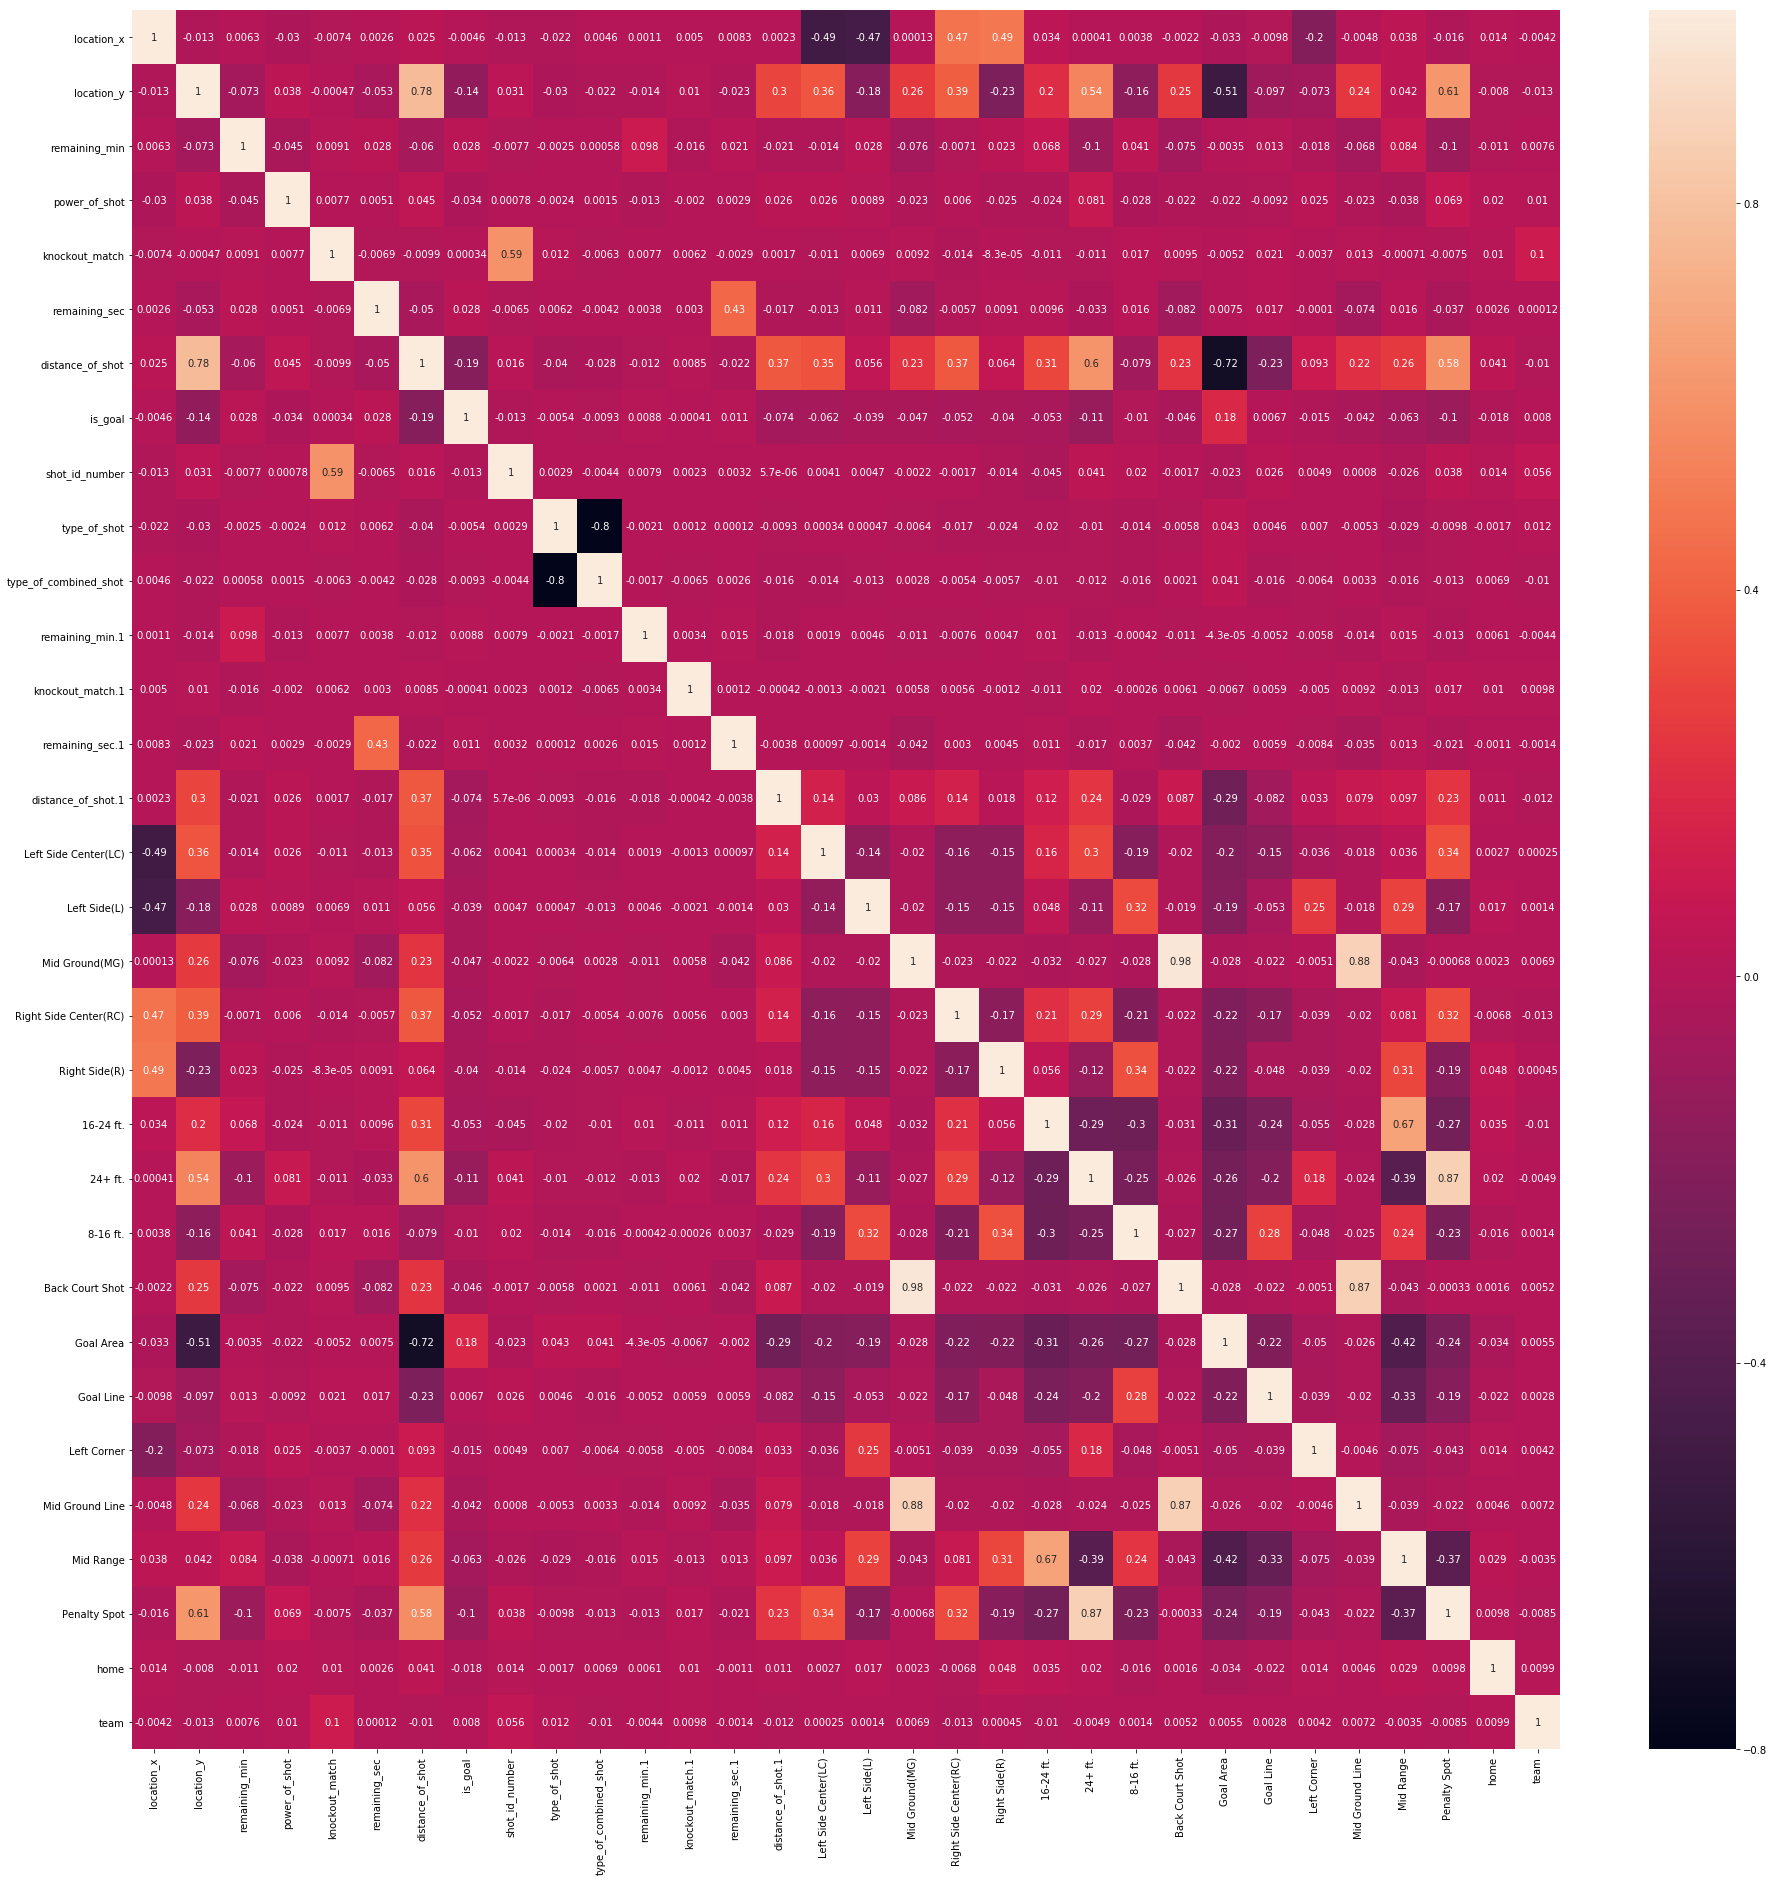

In [226]:
plt.figure(figsize=(32,32))
sns.heatmap(data.corr(), annot = True)

In [60]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.03
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["silent"] = 1
params["max_depth"] = 10
#params["max_delta_step"]=2
params["seed"] = 0
 #params['eval_metric'] = "auc"
plst4 = list(params.items())
num_rounds4 = 1100

In [61]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [62]:
x = test.pop('is_goal')

KeyError: 'is_goal'

In [63]:
import xgboost as xgb
xgdmat=xgb.DMatrix(x, y)

final_gb4=xgb.train(plst4,xgdmat,num_rounds4)

tesdmat=xgb.DMatrix(test)
y_pred=final_gb4.predict(tesdmat)

In [ ]:
# from sklearn import svm
# clf = svm.SVC(gamma='scale')
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(x_train, y_train)
# y_pred = lr.predict(x_test)

In [ ]:
# tesdmat=xgb.DMatrix(test)
# res = final_gb4.predict(tesdmat)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# mae = mean_absolute_error(y_test, y_pred)
# mae
# 1/(1+mae)

In [65]:
# res = lr.predict(test)
submit['is_goal'] = y_pred

In [66]:
submit.to_csv("answer2.csv", index=False)

In [67]:
submit.head()

,shot_id_number,is_goal
0,1,0.085066
1,8,0.715175
2,17,0.997633
3,20,0.048474
4,33,0.512692
